In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv('../data/AirlineData.csv')

In [3]:
df.head()

,Airline,Source,Destination,Number of Stops,Class,Date,Total_Stopover_Time,price in CAD,days_left,Departure_24hr,Arrival_24hr,Arrival_Day_Offset
0,Etihad Airways,Toronto Pearson Intl,Bengaluru Intl,1,Economy Class,2024-06-02,130,2340.0,1,22:10,03:05,2
1,Delta,Toronto Pearson Intl,Bengaluru Intl,1,Economy Class,2024-06-02,1335,1347.0,1,22:40,23:15,2
2,Multiple Airlines,Toronto Pearson Intl,Bengaluru Intl,2,Economy Class,2024-06-02,420,1934.0,1,21:20,07:45,2
3,Multiple Airlines,Toronto Pearson Intl,Bengaluru Intl,2,Economy Class,2024-06-02,380,2291.0,1,21:20,06:50,2
4,Multiple Airlines,Toronto Pearson Intl,Bengaluru Intl,2,Economy Class,2024-06-02,175,2661.0,1,23:40,06:25,2


In [4]:
df.describe()

,Number of Stops,Total_Stopover_Time,price in CAD,days_left,Arrival_Day_Offset
count,384663.000000,384663.000000,384663.000000,384663.000000,384663.000000
mean,1.752069,427.273003,3289.519104,26.192459,1.257030
std,0.593852,228.622875,2107.279540,14.491024,0.713665
min,0.000000,0.000000,261.000000,1.000000,0.000000
25%,1.000000,256.000000,1875.000000,13.000000,1.000000
50%,2.000000,395.000000,2742.000000,26.000000,1.000000
75%,2.000000,575.000000,4547.000000,39.000000,2.000000
max,3.000000,5455.000000,26418.000000,53.000000,5.000000


In [5]:
df.dtypes

Airline                 object
Source                  object
Destination             object
Number of Stops          int64
Class                   object
Date                    object
Total_Stopover_Time      int64
price in CAD           float64
days_left                int64
Departure_24hr          object
Arrival_24hr            object
Arrival_Day_Offset       int64
dtype: object

In [6]:
# Check for missing values
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Number of Stops        0
Class                  0
Date                   0
Total_Stopover_Time    0
price in CAD           0
days_left              0
Departure_24hr         0
Arrival_24hr           0
Arrival_Day_Offset     0
dtype: int64

In [7]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Create correlation matrix
numeric_columns = ['Number of Stops', 'Total_Stopover_Time', 'price in CAD', 'days_left', 'Arrival_Day_Offset']
correlation_matrix = df[numeric_columns].corr()

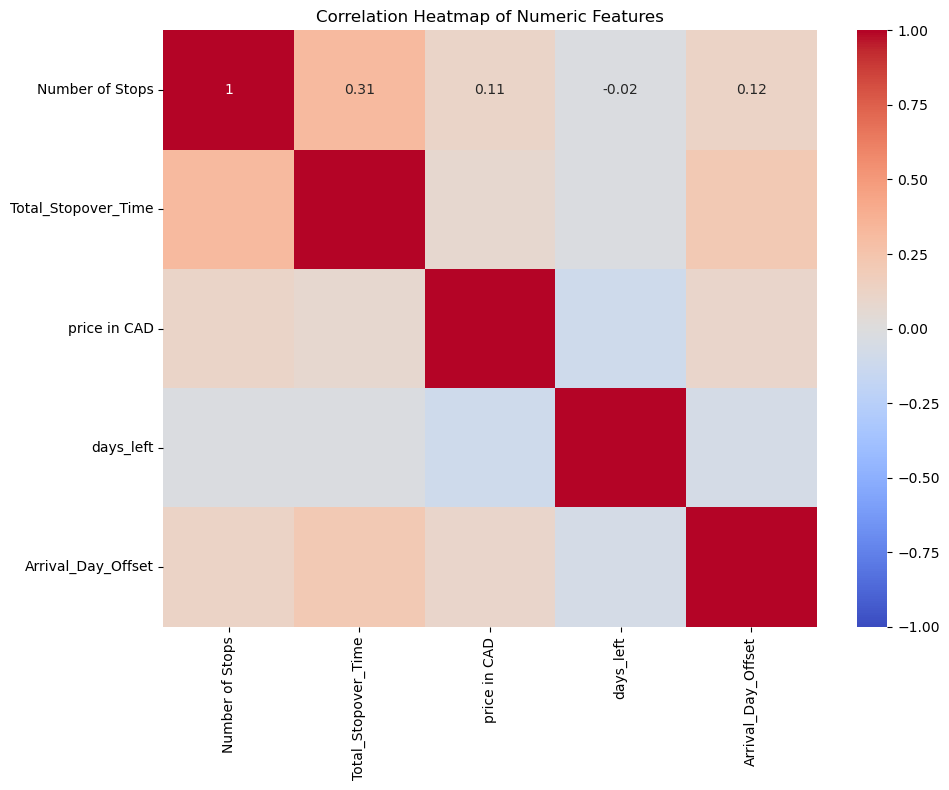

In [9]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

C:\Users\gaura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


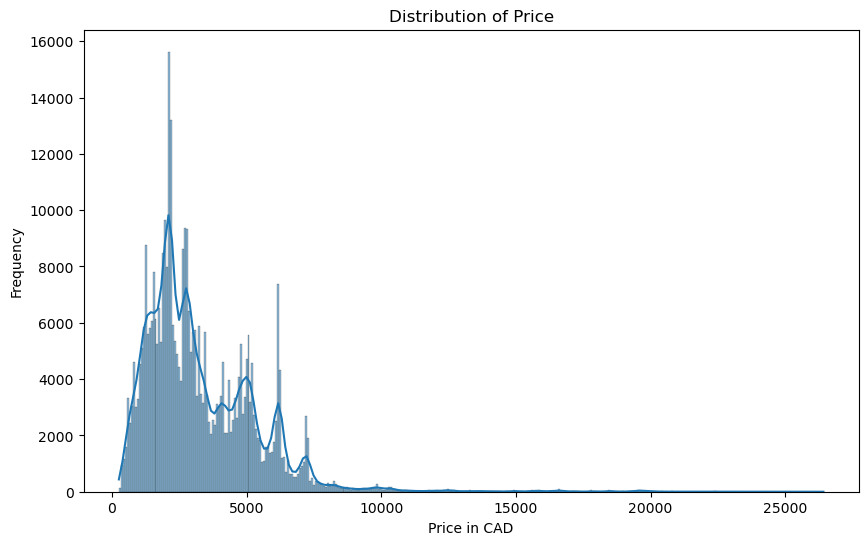

In [10]:
# Plot distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(df['price in CAD'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price in CAD')
plt.ylabel('Frequency')
plt.show()

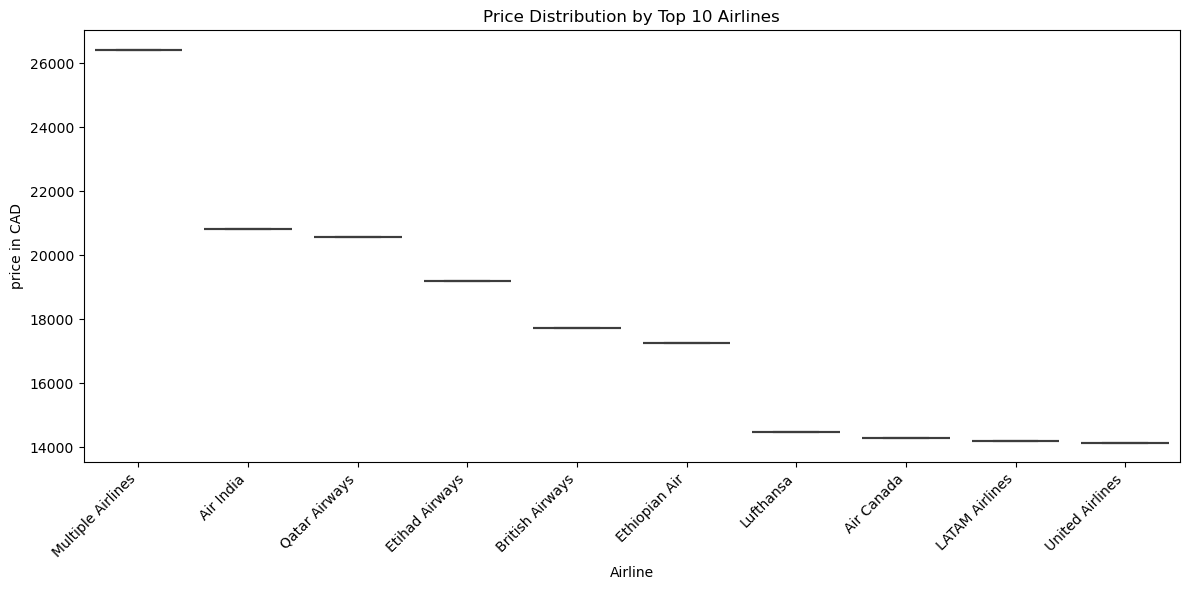

In [11]:
# Box plot of price by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='price in CAD', data=df.sort_values('price in CAD', ascending=False).groupby('Airline').first().reset_index().sort_values('price in CAD', ascending=False).head(10))
plt.title('Price Distribution by Top 10 Airlines')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

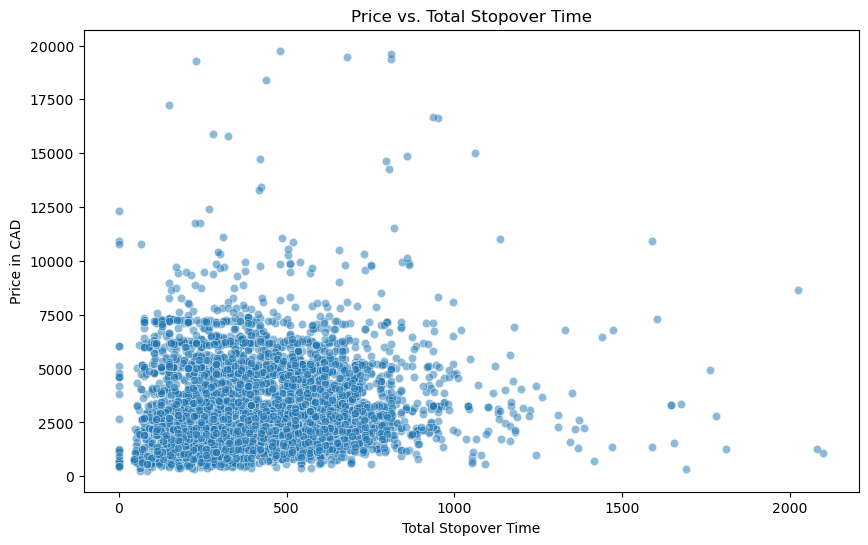

In [12]:
# Scatter plot of price vs. Total_Stopover_Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Stopover_Time', y='price in CAD', data=df.sample(5000), alpha=0.5)
plt.title('Price vs. Total Stopover Time')
plt.xlabel('Total Stopover Time')
plt.ylabel('Price in CAD')
plt.show()

In [13]:
# Create time-based features
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Convert Departure_24hr and Arrival_24hr to minutes since midnight
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

df['Departure_Minutes'] = df['Departure_24hr'].apply(time_to_minutes)
df['Arrival_Minutes'] = df['Arrival_24hr'].apply(time_to_minutes)

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['Airline', 'Source', 'Destination', 'Class']
for col in categorical_columns:
    df[col + '_Encoded'] = le.fit_transform(df[col])

# Drop original categorical columns and date column
df = df.drop(columns=['Airline', 'Source', 'Destination', 'Class', 'Date', 'Departure_24hr', 'Arrival_24hr'])


In [14]:
# Split the data into features (X) and target (y)
X = df.drop('price in CAD', axis=1)
y = df['price in CAD']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
print('Shape of training set:', X_train.shape)
print('Shape of testing set:', X_test.shape)
print('\
Features after engineering:')
print(X.columns.tolist())

Shape of training set: (307730, 12)
Shape of testing set: (76933, 12)
Features after engineering:
['Number of Stops', 'Total_Stopover_Time', 'days_left', 'Arrival_Day_Offset', 'Month', 'Day_of_Week', 'Departure_Minutes', 'Arrival_Minutes', 'Airline_Encoded', 'Source_Encoded', 'Destination_Encoded', 'Class_Encoded']


In [17]:
# Display the first few rows of the engineered dataset
print('First few rows of the engineered dataset:')
X.head()

First few rows of the engineered dataset:


,Number of Stops,Total_Stopover_Time,days_left,Arrival_Day_Offset,Month,Day_of_Week,Departure_Minutes,Arrival_Minutes,Airline_Encoded,Source_Encoded,Destination_Encoded,Class_Encoded
0,1,130,1,2,6,6,1330,185,20,13,0,1
1,1,1335,1,2,6,6,1360,1395,15,13,0,1
2,2,420,1,2,6,6,1280,465,30,13,0,1
3,2,380,1,2,6,6,1280,410,30,13,0,1
4,2,175,1,2,6,6,1420,385,30,13,0,1


In [18]:
# Train and evaluate Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')


In [25]:

# Train and evaluate XGBoost
dt_model =  DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2')


In [26]:

# Print results
print('Random Forest Results:')
print(f'MSE: {rf_mse:.2f}')
print(f'R2 Score: {rf_r2:.4f}')
print(f'Cross-validation R2 Scores: {rf_cv_scores}')
print(f'Mean CV R2 Score: {np.mean(rf_cv_scores):.4f}')

print('Decision Tree Results:')
print(f'MSE: {dt_mse:.2f}')
print(f'R2 Score: {dt_r2:.4f}')
print(f'Cross-validation R2 Scores: {dt_cv_scores}')
print(f'Mean CV R2 Score: {np.mean(dt_cv_scores):.4f}')

Random Forest Results:
MSE: 425759.69
R2 Score: 0.9041
Cross-validation R2 Scores: [0.8936062  0.89048705 0.89517412 0.89301251 0.89662812]
Mean CV R2 Score: 0.8938
Decision Tree Results:
MSE: 600894.14
R2 Score: 0.8646
Cross-validation R2 Scores: [0.843487   0.83901461 0.84766141 0.84766966 0.84676585]
Mean CV R2 Score: 0.8449


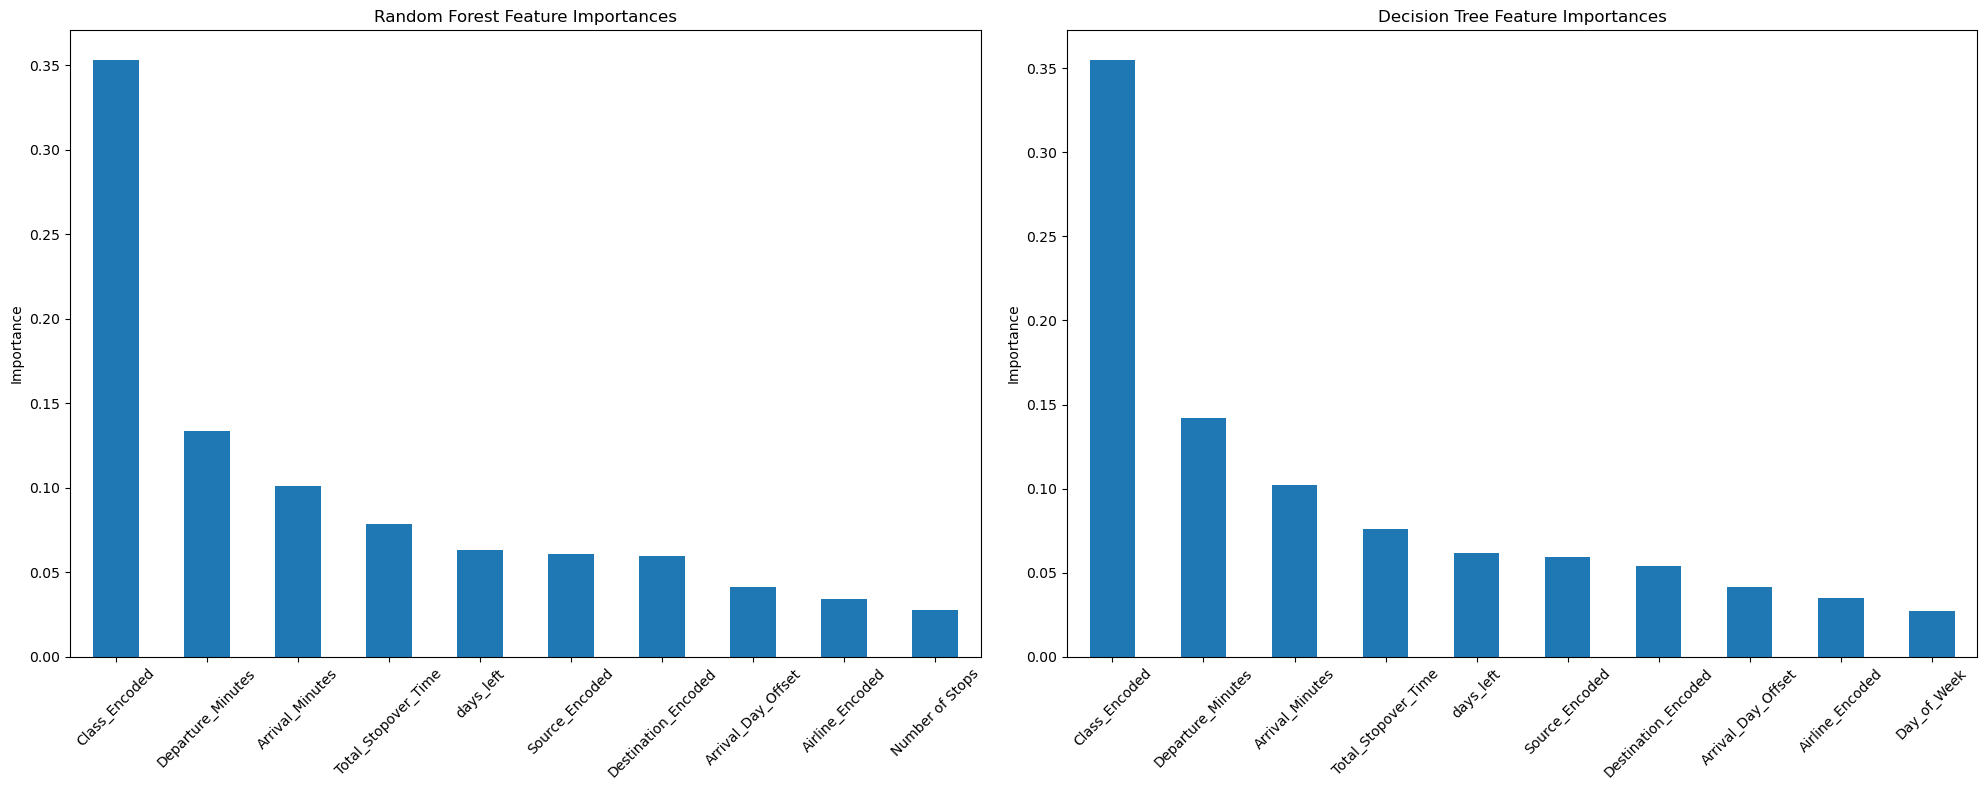

Model training, evaluation, and feature importance analysis completed.


In [27]:
# Plot feature importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
dt_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

rf_importances.head(10).plot(kind='bar', ax=ax1)
ax1.set_title('Random Forest Feature Importances')
ax1.set_ylabel('Importance')
ax1.tick_params(axis='x', rotation=45)

dt_importances.head(10).plot(kind='bar', ax=ax2)
ax2.set_title('Decision Tree Feature Importances')
ax2.set_ylabel('Importance')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print('Model training, evaluation, and feature importance analysis completed.')